<a href="https://colab.research.google.com/github/ddivebkhan/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R.


# Content:

## Columns

    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance

# Acknowledgements

The dataset is available on GitHub here : https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

# Inspiration

Can you accurately predict insurance costs?

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [58]:
#kagglehub dataset_download stores to current working directory
file_path = path + '/insurance.csv'

# Read the CSV into a pandas DataFrame.
df = pd.read_csv(file_path)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df.info()

# The `df.info()` method provides a quick overview of a pandas DataFrame’s structure, displaying data types, null values,
# and memory usage for each column, which is crucial for understanding the dataset before analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [62]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# EXPLORATORY DATA ANALYSIS

##Relationship Between Age and Medical Expenses:

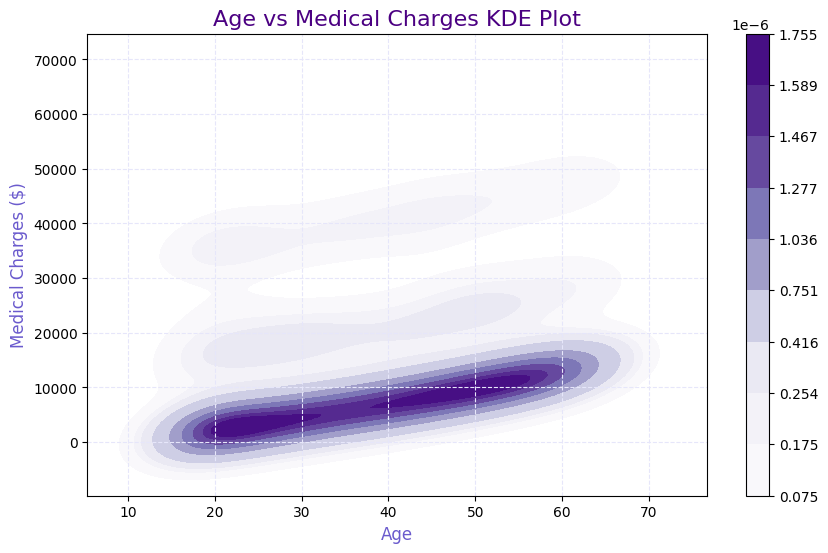

In [63]:
"""This code snippet is creating a visualization to explore the relationship between a person's age and their medical charges
using a Kernel Density Estimation (KDE) """

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="age",
    y="charges",
    cmap="Purples",
    shade=True,
    cbar=True
)

plt.title("Age vs Medical Charges KDE Plot", fontsize=16, color='indigo')
plt.xlabel("Age", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, color='lavender', linestyle='--')
plt.show()

#Gender and Average Medical Expenses#

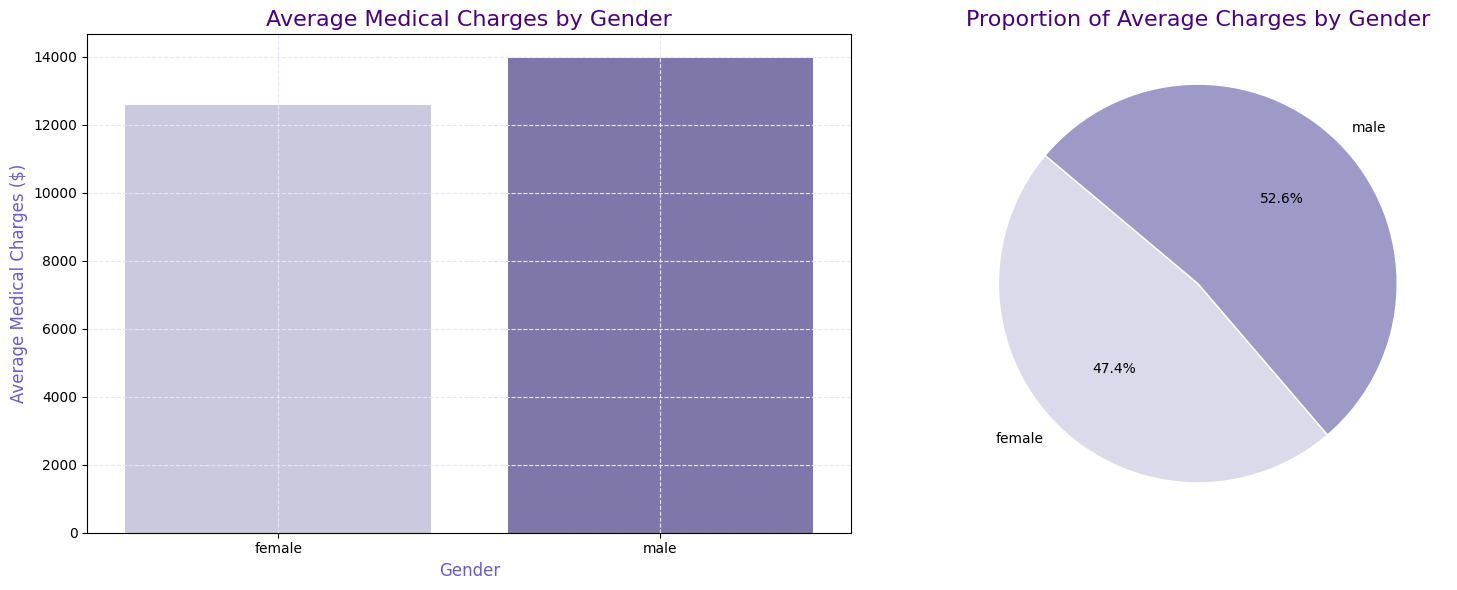

In [64]:
average_charges_by_sex = df.groupby('sex')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 3)

sns.barplot(ax=axes[0], data=average_charges_by_sex, x="sex", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Gender", fontsize=16, color='indigo')
axes[0].set_xlabel("Gender", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')


axes[1].pie(
    average_charges_by_sex['charges'],
    labels=average_charges_by_sex['sex'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Gender", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Comparison of Smokers and Non-Smokers:#

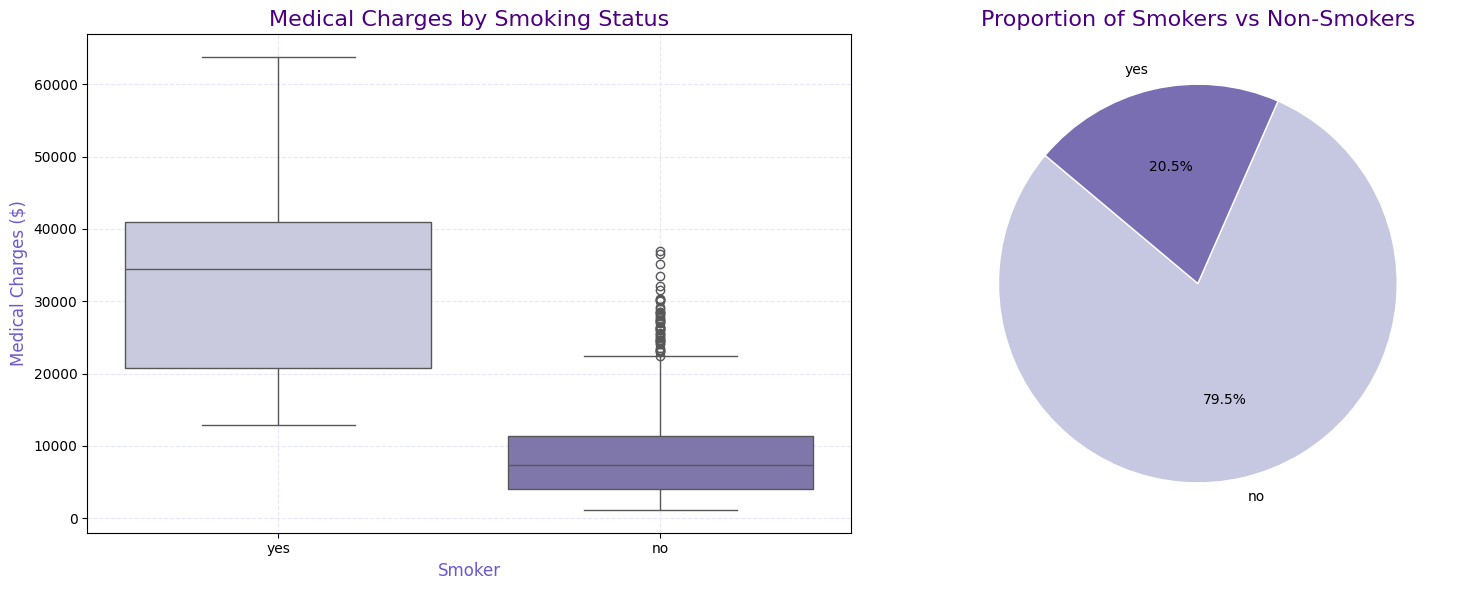

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", 2)

sns.boxplot(ax=axes[0], data=df, x="smoker", y="charges", palette="Purples")
axes[0].set_title("Medical Charges by Smoking Status", fontsize=16, color='indigo')
axes[0].set_xlabel("Smoker", fontsize=12, color='slateblue')
axes[0].set_ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

smoker_counts = df['smoker'].value_counts()
axes[1].pie(
    smoker_counts,
    labels=smoker_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Smokers vs Non-Smokers", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()


#Cost Analysis by Region:#

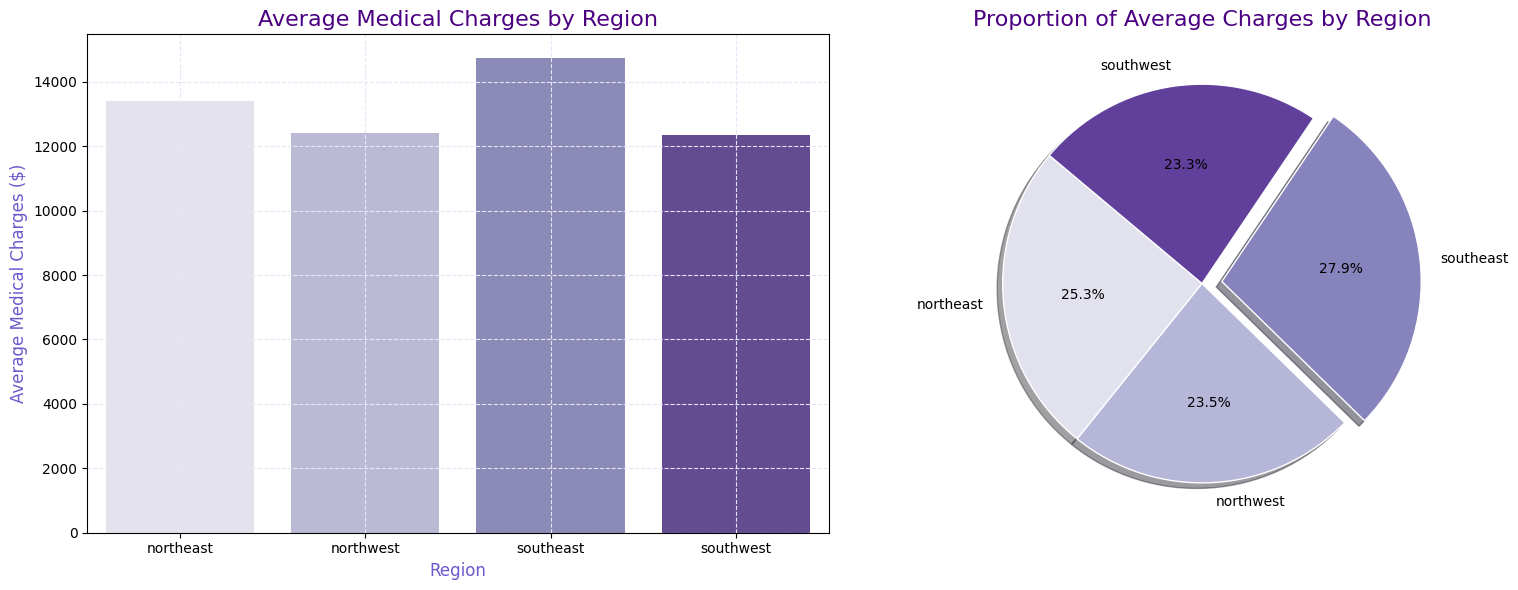

In [66]:
average_charges_by_region = df.groupby('region')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_region))


sns.barplot(ax=axes[0], data=average_charges_by_region, x="region", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Region", fontsize=16, color='indigo')
axes[0].set_xlabel("Region", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_region['charges']
regions = average_charges_by_region['region']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=regions,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Region", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Relationship Between Number of Children and Expenses:#

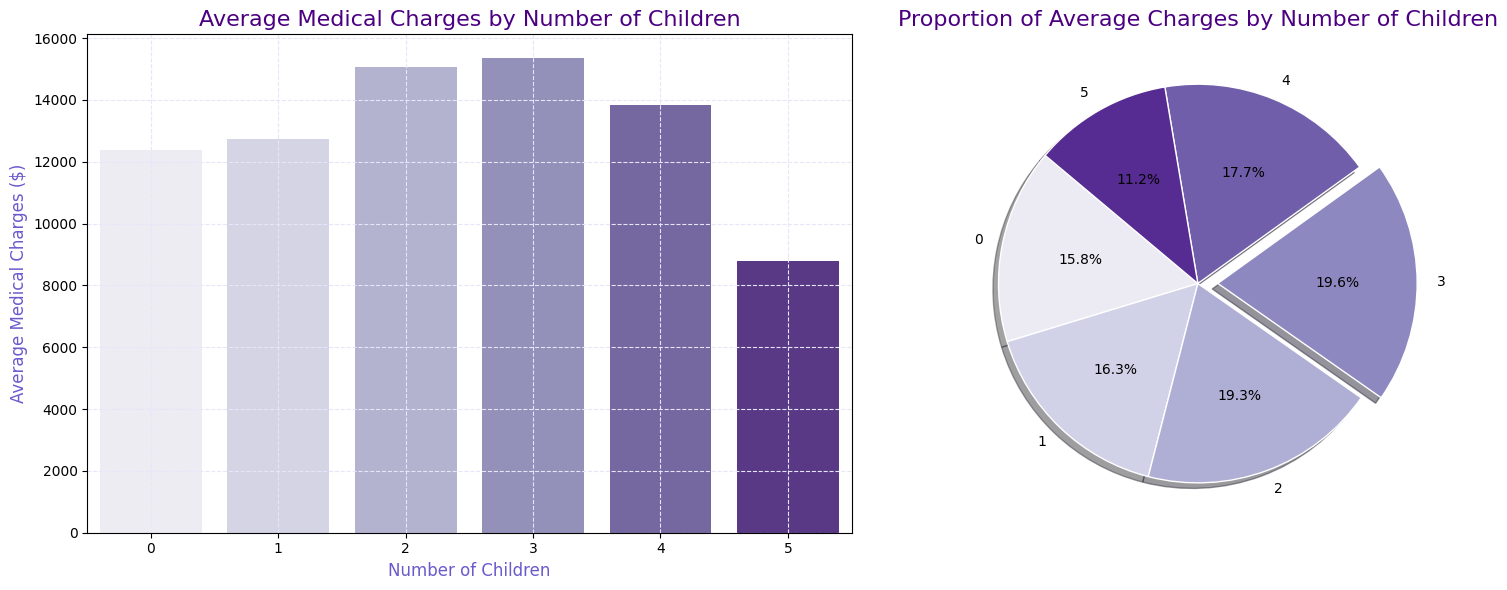

In [67]:
average_charges_by_children = df.groupby('children')['charges'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Purples", len(average_charges_by_children))


sns.barplot(ax=axes[0], data=average_charges_by_children, x="children", y="charges", palette="Purples")
axes[0].set_title("Average Medical Charges by Number of Children", fontsize=16, color='indigo')
axes[0].set_xlabel("Number of Children", fontsize=12, color='slateblue')
axes[0].set_ylabel("Average Medical Charges ($)", fontsize=12, color='slateblue')
axes[0].grid(True, linestyle='--', color='lavender')

charges = average_charges_by_children['charges']
children = average_charges_by_children['children']
explode = [0.1 if i == charges.idxmax() else 0 for i in range(len(charges))]
axes[1].pie(
    charges,
    labels=children,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Proportion of Average Charges by Number of Children", fontsize=16, color='indigo')

plt.tight_layout()
plt.show()

#Combined Effect of Smoking, BMI and Expenses:#

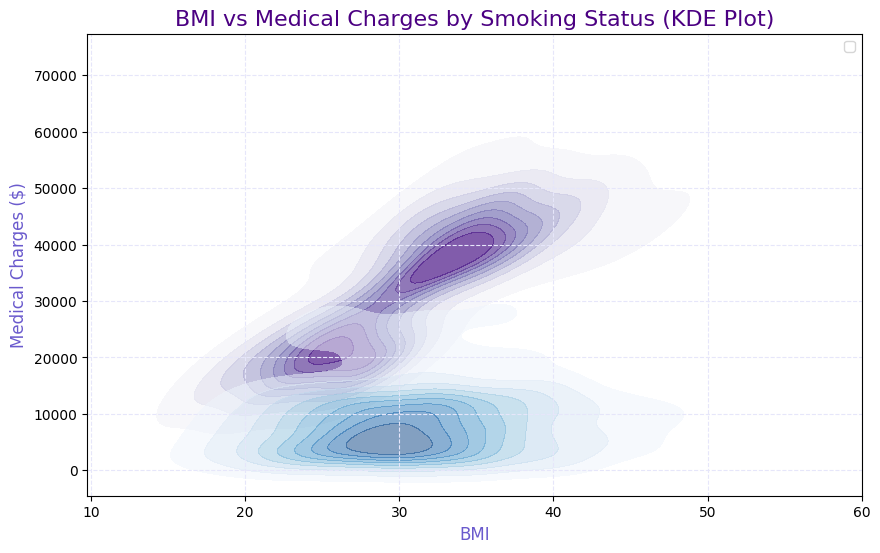

In [68]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df[df['smoker'] == 'yes'],
    x="bmi",
    y="charges",
    cmap="Purples",
    shade=True,
    alpha=0.7,
    label="Smoker",
    linewidth=2
)

sns.kdeplot(
    data=df[df['smoker'] == 'no'],
    x="bmi",
    y="charges",
    cmap="Blues",
    shade=True,
    alpha=0.5,
    label="Non-Smoker",
    linewidth=2
)

plt.title("BMI vs Medical Charges by Smoking Status (KDE Plot)", fontsize=16, color='indigo')
plt.xlabel("BMI", fontsize=12, color='slateblue')
plt.ylabel("Medical Charges ($)", fontsize=12, color='slateblue')
plt.grid(True, linestyle='--', color='lavender')
plt.legend()
plt.show()



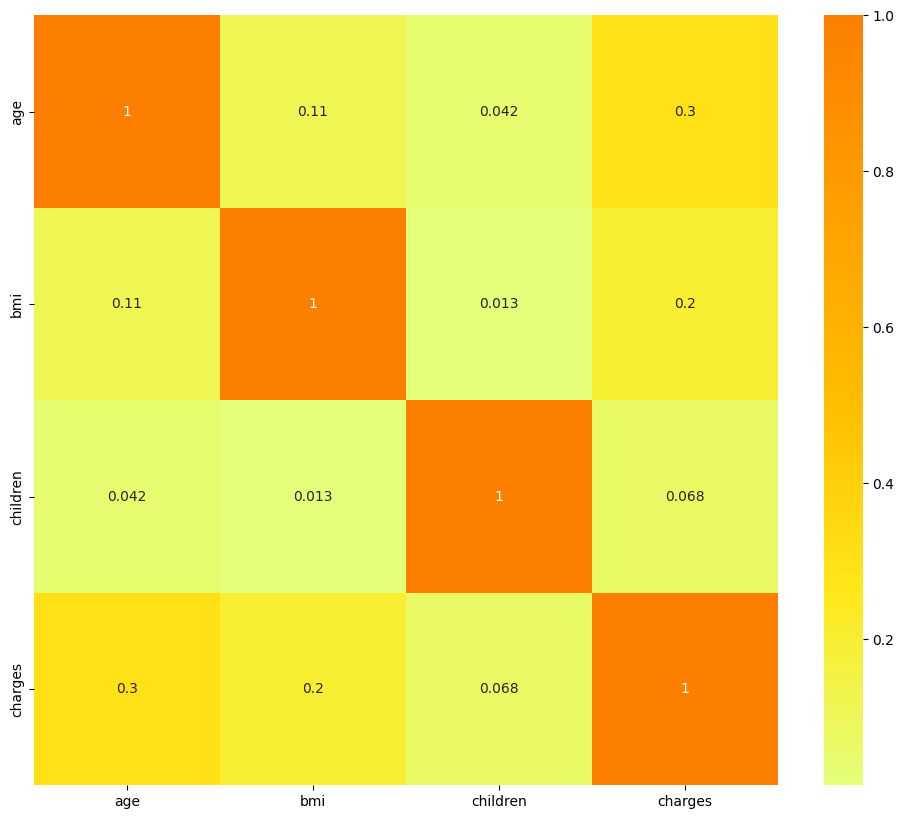

In [69]:
# prompt: Plot correlation heatmap using seaborn

plt.figure(figsize=(12, 10))


# correlation plot
corr = df[['age','bmi','children','charges']].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);




# Data Preprocessing

# Encoding

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

    Label Encoding
    One hot encoding
    Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.

In [70]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'],drop_first =True)

In [71]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


#Normality Check

Checking the normality of your dependent variable is an important step in many statistical analyses, especially in regression, ANOVA, and other parametric tests that assume normality. Here are several methods to check for normality:

**A. Visual Inspection**

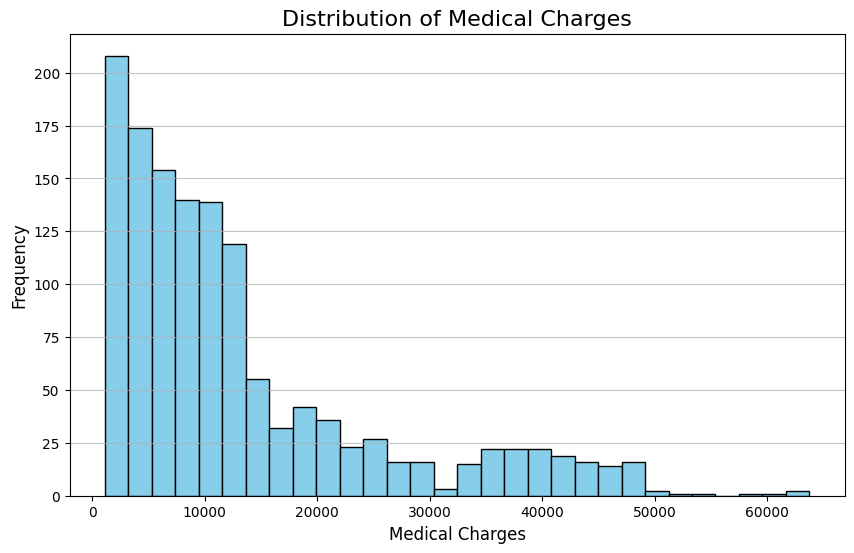

In [72]:
 #Plot a histogram of your dependent variable medial charges

plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Medical Charges', fontsize=16)
plt.xlabel('Medical Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()


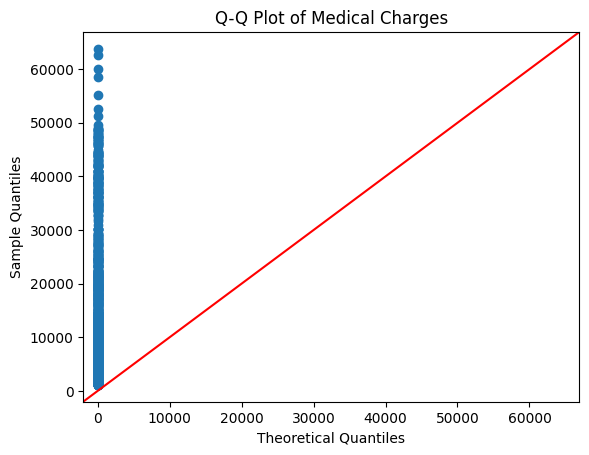

In [73]:
#  make Q-Q Plot (Quantile-Quantile Plot)

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create the Q-Q plot
fig = sm.qqplot(df['charges'], line='45')
plt.title('Q-Q Plot of Medical Charges')
plt.show()


**B. Statistical Tests**

In [74]:
"""
Shapiro-Wilk Test:
The Shapiro-Wilk test is a statistical test used to assess whether a given dataset follows a normal distribution.
- Null hypothesis (H0H0​): The data is normally distributed.
- If the p-value is less than the significance level (e.g., 0.05), reject H0H0​ (indicating non-normality).
"""



'\nShapiro-Wilk Test:\nThe Shapiro-Wilk test is a statistical test used to assess whether a given dataset follows a normal distribution.\n- Null hypothesis (H0H0\u200b): The data is normally distributed.\n- If the p-value is less than the significance level (e.g., 0.05), reject H0H0\u200b (indicating non-normality).\n'

In [75]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(df['charges'])

print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The data is not normally distributed (reject the null hypothesis)")
else:
    print("The data is normally distributed (fail to reject the null hypothesis)")


Shapiro-Wilk Test Statistic: 0.8146881157362383
P-value: 1.1505226334932036e-36
The data is not normally distributed (reject the null hypothesis)


In [76]:
# Calculate skewness and kurtosis for numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
skewness = df[numerical_features].skew()
kurtosis = df[numerical_features].kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Kurtosis:
 age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64


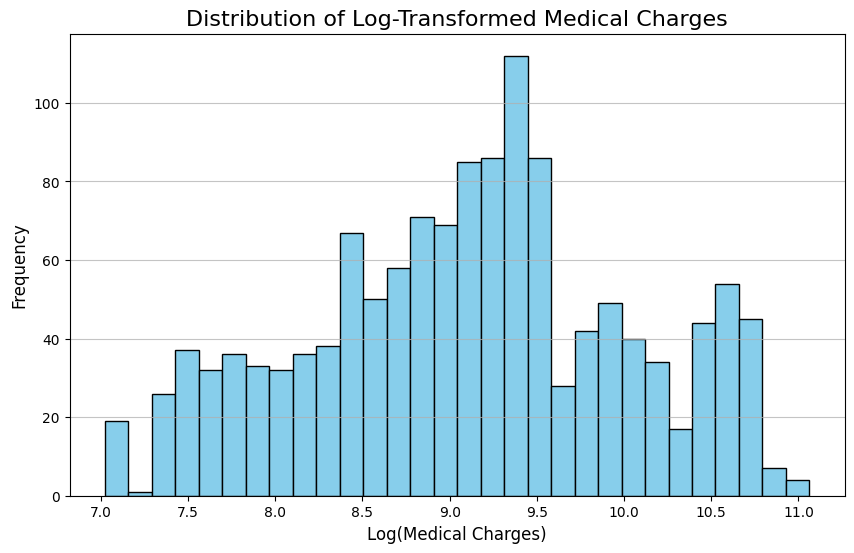

Shapiro-Wilk Test Statistic (log-transformed): 0.9831647614892022
P-value (log-transformed): 2.291335899652065e-11
The log-transformed data is not normally distributed.


In [79]:


import numpy as np

# Log transformation of 'charges'
df_encoded['charges'] = np.log(df['charges'])


plt.figure(figsize=(10, 6))
plt.hist(df_encoded['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Medical Charges', fontsize=16)
plt.xlabel('Log(Medical Charges)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Perform the Shapiro-Wilk test on the log-transformed data
statistic, p_value = shapiro(df_encoded['charges']) # Changed from df['charges'] to df_encoded['charges']

print(f"Shapiro-Wilk Test Statistic (log-transformed): {statistic}")
print(f"P-value (log-transformed): {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The log-transformed data is not normally distributed.")
else:
    print("The log-transformed data appears to be normally distributed.")

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math

# Features (X) and target (y)
X = df_encoded.drop(['charges'], axis=1)
y = df_encoded['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set (in log scale)
y_pred_log = model.predict(X_test)

# Exponentiate predictions to get back to original scale
y_pred = np.exp(y_pred_log)

# Evaluate the model on the original scale
mse = mean_squared_error(np.exp(y_test), y_pred)  # Compare original charges
rmse = math.sqrt(mse)  # Calculate RMSE
r2 = r2_score(np.exp(y_test), y_pred)  # R-squared on original scale

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 61079027.74116512
Root Mean Squared Error (RMSE): 7815.307271065234
R-squared: 0.6065730962548852




The model returns R2 value of 60.65%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique.

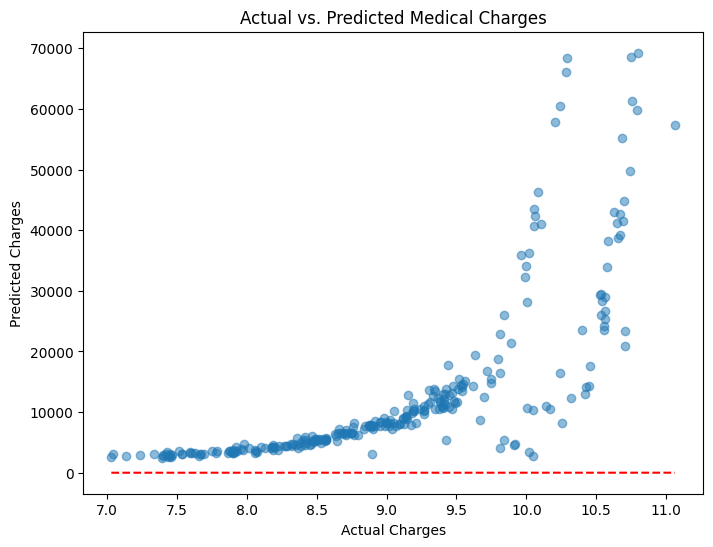

In [81]:


# Visualize model performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Charges")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()


Random Forest - Mean Squared Error (MSE): 21051837.115221933
Random Forest - Root Mean Squared Error (RMSE): 4588.228101917115
Random Forest - R-squared: 0.864399297096109


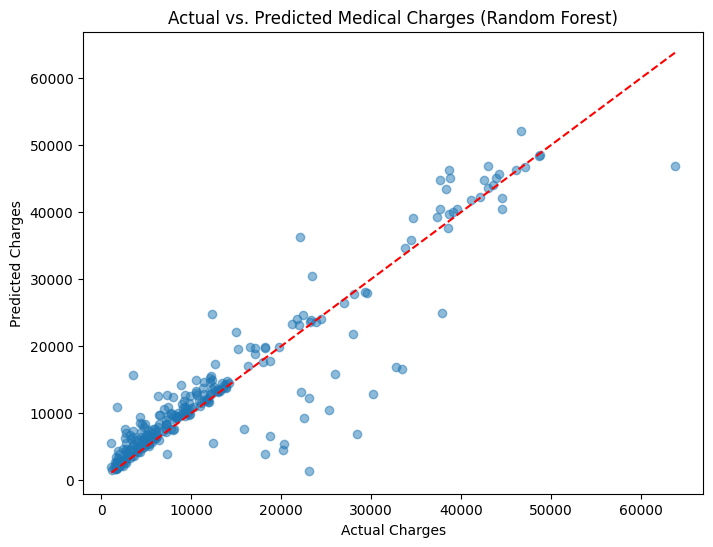

In [90]:
# prompt: use random forest regressor

from sklearn.ensemble import RandomForestRegressor


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = math.sqrt(rf_mse)  # Calculate RMSE
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rf_rmse}")
print(f"Random Forest - R-squared: {rf_r2}")


# Visualize model performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Medical Charges (Random Forest)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()
